In [119]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os 

In [81]:
#Import your data into a Pandas DataFrame
ride_data_df = pd.read_csv(os.path.join("Resources","ride_data.csv"))
city_data_df = pd.read_csv(os.path.join("Resources", "city_data.csv"))

In [82]:
city_data_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [83]:
ride_data_df.head(5) 

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [84]:
#Merge your DataFrames.
ride_city_merged = pd.merge(ride_data_df, city_data_df , on = ["city","city"] )
ride_city_merged.head(5)



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [85]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [86]:
#Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
urban_cities_df = ride_city_merged[ride_city_merged["type"]== "Urban"]
suburban_cities_df = ride_city_merged[ride_city_merged["type"]== "Suburban"]
rural_cities_df = ride_city_merged[ride_city_merged["type"]== "Rural"]

In [87]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [88]:
urban_avg_fare = urban_cities_df.groupby("city").mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby("city").mean()["fare"]
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
urban_avg_fare.head(5)

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [89]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

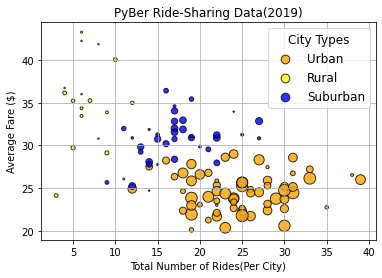

In [129]:
plt.scatter(urban_ride_count, urban_avg_fare, 
            s = urban_driver_count * 2, 
            color = "orange", label = "Urban",
            edgecolor="black", linewidths=1,
            alpha=0.8)
plt.scatter(rural_ride_count, rural_avg_fare, 
            s = rural_driver_count * 2, 
            color = "Yellow", label = "Rural",
            edgecolor="black", linewidths=1,
            alpha=0.8)
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s = suburban_driver_count * 2, 
            color = "Blue", label = "Suburban",
            edgecolor="black", linewidths=1,
            alpha=0.8 )
plt.grid()
plt.legend()
plt.title("PyBer Ride-Sharing Data(2019)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.savefig("analysis/Fig1.png")
plt.show()

No handles with labels found to put in legend.


IndexError: list index out of range

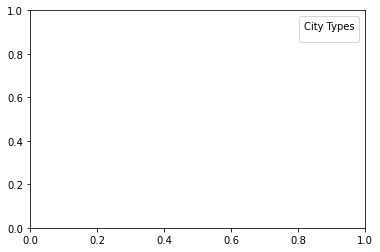